In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [8]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
df=pd.read_csv("AIML Dataset.csv")

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.shape

(6362620, 11)

In [16]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

<function matplotlib.pyplot.show(close=None, block=None)>

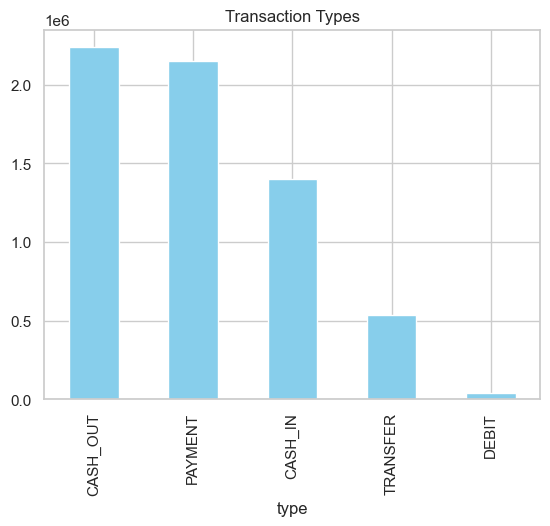

In [17]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types",color="skyblue")
plt.xlabel=("transaction type")
plt.ylabel=("count")
plt.show

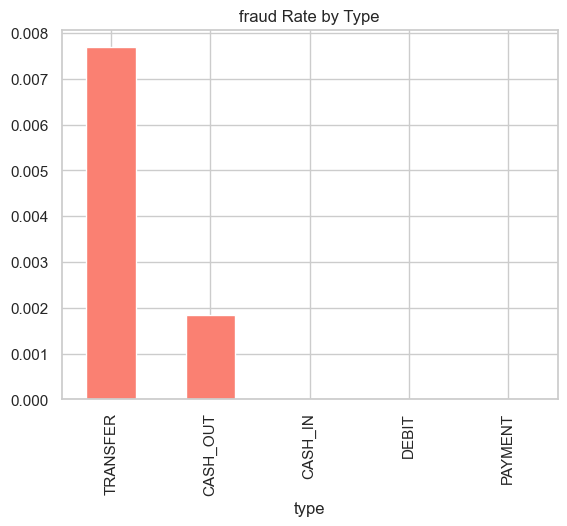

In [18]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="fraud Rate by Type",color="salmon")
plt.ylabel=("Faud rate")
plt.show()

In [19]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

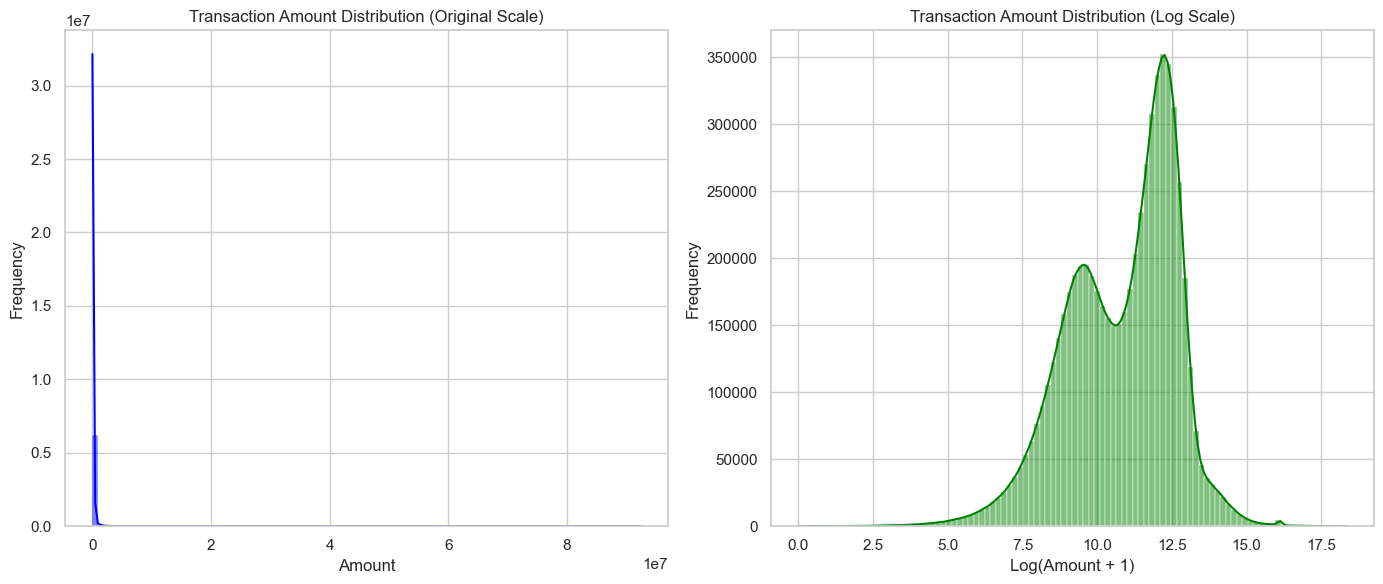

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df["amount"], bins=100, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Transaction Amount Distribution (Original Scale)")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Frequency")

sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green", ax=axes[1])
axes[1].set_title("Transaction Amount Distribution (Log Scale)")
axes[1].set_xlabel("Log(Amount + 1)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

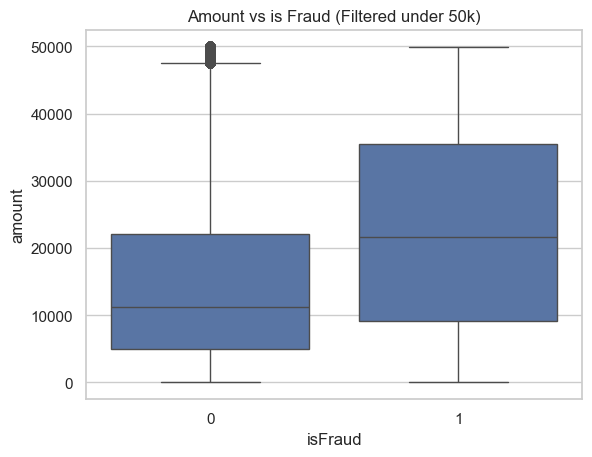

In [21]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs is Fraud (Filtered under 50k)")
plt.show()

In [22]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]



In [24]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [25]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [26]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


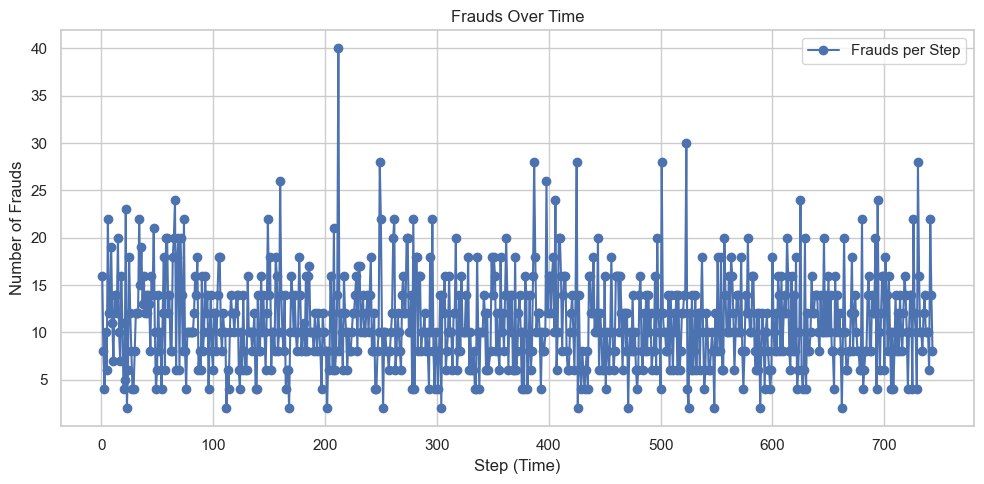

In [ ]:
plt.xlabel = getattr(plt, "xlabel")
plt.ylabel = getattr(plt, "ylabel")
plt.title = getattr(plt, "title")

if 'step' in df.columns and 'isFraud' in df.columns:
    
    
    frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()

   
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(frauds_per_step.index, frauds_per_step.values, marker='o', label="Frauds per Step")

   
    ax.set_xlabel("Step (Time)")
    ax.set_ylabel("Number of Frauds")
    ax.set_title("Frauds Over Time")
    
    ax.grid(True)
    ax.legend()
    fig.tight_layout()
    plt.show()

else:
    print("Error: 'step' or 'isFraud' column is missing in the DataFrame.")

In [ ]:
df.drop(columns="step",inplace=True)



In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
top_senders=df["nameOrig"].value_counts().head(10)

In [ ]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [ ]:
top_receivers=df["nameDest"].value_counts().head(10)

In [ ]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [ ]:
fraud_users=df[df["isFraud"]== 1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [ ]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

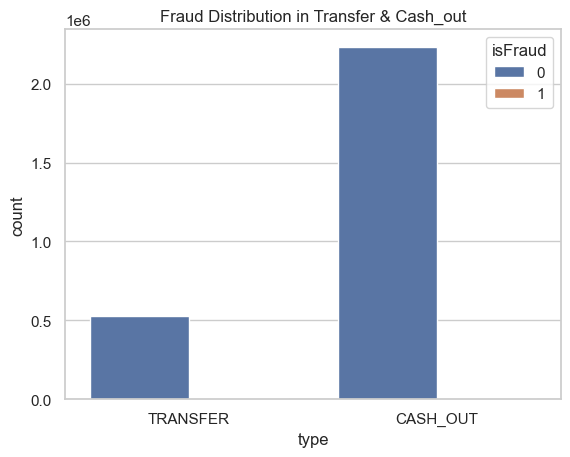

In [ ]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_out")
plt.show()

In [ ]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [ ]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


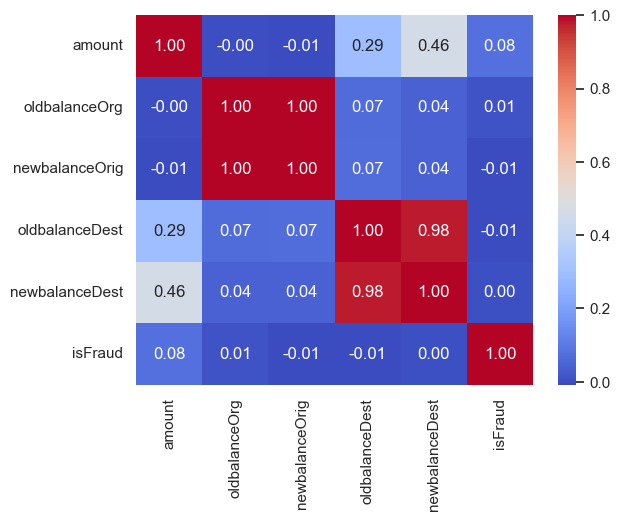

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title=("Coorelation Matrix")
plt.show()

In [ ]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [ ]:
len(zero_after_transfer)

1188074

In [ ]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [ ]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.head()


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [ ]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [ ]:
categorical =["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]


In [ ]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"
)

In [ ]:
pipeline =Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [ ]:
confusion_matrix(y_test,y_pred)

array([[1806490,   99832],
       [    137,    2327]])

In [ ]:
pipeline.score(X_test,y_test)*100

94.76269209853803

In [ ]:
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline.pkt")

['fraud_detection_pipeline.pkt']